# Yandex Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent 
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

## Refresher on Ordinary Least Square (OLS) aka Linear Regeression

### Lecture Note

In Matrix notation, the matrix $X$ is of dimensions $n \times p$ where each row is an example and each column is a feature dimension. 

Similarily, $y$ is of dimension $n \times 1$ and $w$ is of dimensions $p \times 1$.

The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.

Our objective is to optimize the loss $L$ defines as resiudal sum of squares (RSS): 

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$ (notice that in matrix notation this means summing over all examples, so $L$ is scalar.)

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes )

Thus, the gardient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

The first term, $(X^TX)^{-1}X^T$ is also called the pseudo inverse of $X$.

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.


## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset by using the scikit-learn package. hint: [load_boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html). 

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * reset - True / False boolean to reset starting w values, relevant in gradient descent OlsCd and OlsGd. Usually its reseted to 0's
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs

In [1]:
# boston housing dataset by using the scikit-learn package:
from sklearn.datasets import load_boston
import numpy as np

X, y = load_boston(return_X_y=True)
print(X.shape)
print(y.shape)

(506, 13)
(506,)


##### What is  p? what is n in the above notation?
n- is the number of samples, it is the rows in out X matrix. n=506

p- number of parameters that explain the y. it is the columns of the X matrix. p=13

In [2]:
# * write a model `Ols` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score`.? hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

class Ols(object):
    def __init__(self):
        self.w = None

    @staticmethod
    def pad(X):
        x0 = np.ones(X.shape[0])
        x0 = np.matrix(x0).T
        X = np.concatenate((x0, X), axis=1)
        return X

    def fit(self, X, Y):
        #remeber pad with 1 before fitting
        self._fit(X, Y)

    def _fit(self, X, Y):
        # optional to use this
        X = Ols.pad(X)
        self.w = np.dot(np.linalg.pinv(X),Y)

    def predict(self, X):
        #return wx
        X = self._predict(X)
        y_predict = np.ravel(np.dot(X, self.w.T))
        return y_predict

    def _predict(self, X):
        X = Ols.pad(X)
        return X

    def score(self, X, Y):
        #return MSE
        y_predict = self.predict(X)
        mse = np.square(np.subtract(Y,y_predict)).mean()
        return mse

In [3]:
#Fit the model. What is the training MSE
LR_Ols_model = Ols()
LR_Ols_model.fit(X,y)
y_predict = LR_Ols_model.predict(X)
mse = LR_Ols_model.score(X, y)
print(f'MSE: {mse}')

MSE: 21.894831181729206


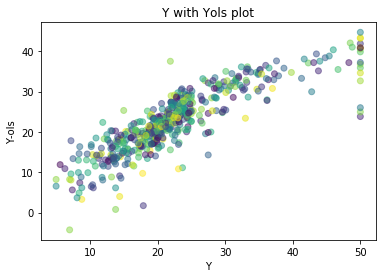

In [4]:
#Plot a scatter plot where on x-axis plot Y and in the y-axis Y-ols
import matplotlib.pyplot as plt

colors = np.random.rand(506)
plt.scatter(y, y_predict, c=colors, alpha=0.5)
plt.title("Y with Yols plot")
plt.xlabel("Y")
plt.ylabel("Y-ols")
plt.show()

In [5]:
#Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test?
from sklearn.model_selection import train_test_split

mse_train_list = []
mse_test_list = []

def find_mse(x_train, y_train, x_test, y_test):
    LR_Ols_model = Ols()
    LR_Ols_model.fit(x_train, y_train)
    mse_train = LR_Ols_model.score(x_train, y_train)
    
    mse_test = LR_Ols_model.score(x_test, y_test)
    return mse_train, mse_test

for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None, shuffle=True)
    mse_train, mse_test = find_mse(X_train, y_train, X_test, y_test)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    
avg_mse_train = np.mean(np.array(mse_train_list))
avg_mse_test = np.mean(np.array(mse_test_list))
avg_total_mse = np.mean(np.array(mse_train_list+mse_test_list))

print(f'mse train: {avg_mse_train}, mse test: {avg_mse_test}')
print(f'Total mse avg: {avg_total_mse}')

mse train: 21.518336000940366, mse test: 24.376957489369175
Total mse avg: 22.94764674515477


In [6]:
#Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value?
from scipy import stats

t_test = stats.ttest_rel(mse_train_list, mse_test_list)
print(f'P-value: {t_test[1]}')
print(f'If alpha=0.1 > p-value={t_test[1]} and we will reject the null hypothesis of equal averages')

P-value: 0.04222413955947899
If alpha=0.1 > p-value=0.04222413955947899 and we will reject the null hypothesis of equal averages


In [7]:
# Write a new class OlsGd which solves the problem using gradinet descent. 
# The class should get as a parameter the learning rate and number of iteration. 
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate? 
# How would you find number of iteration automatically? 
# Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your feature first.
class Normalizer():
    def __init__(self):
        self.x_means = None
        self.x_stds = None

    def fit(self, X):
        self.x_means = np.mean(X, axis=0)
        self.x_stds = np.std(X, axis=0)

    def predict(self, X):
        #apply normalization
        X_normalize = (X-self.x_means)/self.x_stds
        return X_normalize
    
class OlsGd(Ols):
  
    def __init__(self, learning_rate=.05, num_iteration=1000, normalize=True, early_stop=True, verbose=True):
        super(OlsGd, self).__init__()
        self.learning_rate = learning_rate
        self.num_iteration = num_iteration
        self.early_stop = early_stop
        self.normalize = normalize
        self.normalizer = Normalizer()    
        self.verbose = verbose
        self.loss_results = []
        self.eps = 0.001
        self.dw_size = None
    
    def _fit(self, X, Y, reset=True, track_loss=True):
        #remeber to normalize the data before starting
        if self.normalize:
            self.normalizer.fit(X)
            X = self.normalizer.predict(X)
        X = OlsGd.pad(X)
        if reset:
            self.w = np.zeros(X.shape[1])
        else:
            self.w = np.random.rand(X.shape[1])

        for iterate in range(self.num_iteration):
            old_w = self.w
            dw_step = self._step(X,Y)
            self.w = self.w - self.learning_rate * dw_step
            loss = self._find_loss(X,Y)
            if track_loss:
                self.loss_results.append(loss)
            if self.early_stop:
                to_stop_early = self.check_early_stop(old_w, dw_step)
                if to_stop_early:
                    break
            
    def check_early_stop(self, old_w, dw_step):
        early_stopping = False
        
        absolute_dw = np.absolute(dw_step)
        if np.all(absolute_dw < self.eps):
            early_stopping = True 
        
        if len(self.loss_results) > 1:
            diff_loss = self.loss_results[-2] - self.loss_results[-1]
            if diff_loss < self.eps:
                early_stopping = True
            
        diff_w = np.sum(abs(old_w - self.w))
        if diff_w < self.eps:
            early_stopping = True
        return early_stopping
                
    def _predict(self, X):
    #remeber to normalize the data before starting
        if self.normalize:
            self.normalizer.fit(X)
            X = self.normalizer.predict(X)
        X = OlsGd.pad(X)
        return X
      
    def _step(self, X, Y):
    # use w update for gradient descent
        y_current_predict = np.ravel(np.dot(X, self.w.T))
        dw = (2/X.shape[0]) * np.dot(X.T, (y_current_predict-Y))
        return dw
    
    def _find_loss(self, X, Y):
        current_prediction = np.ravel(np.dot(X, self.w.T))
        current_loss = np.square(np.subtract(Y,current_prediction)).mean()
        return current_loss

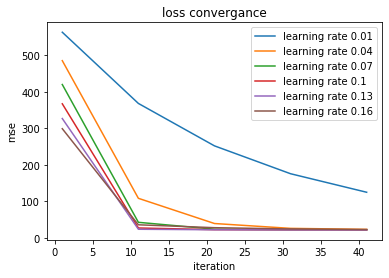

In [8]:
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.

lr_list = np.arange(0.01,0.17,0.03)
iterations_list = np.arange(1,50,10)
for lr in lr_list:
    current_mse_list = []
    for num_iter in iterations_list:
        LR_OlsGd_model = OlsGd(learning_rate=lr, num_iteration=num_iter)
        LR_OlsGd_model._fit(X, y)
        mse = LR_OlsGd_model.score(X,y)
        current_mse_list.append(mse)
    plt.plot(iterations_list, current_mse_list, label = f'learning rate {round(lr,3)}')

plt.xlabel('iteration')
plt.ylabel('mse')
plt.title("loss convergance")
plt.legend()    
plt.show()

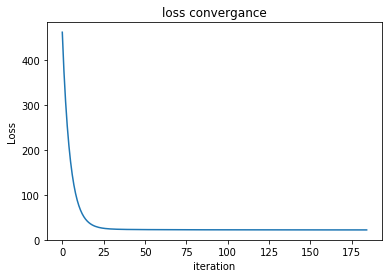

In [9]:
# Plot the loss convergance.
LR_OlsGd = OlsGd()
LR_OlsGd._fit(X, y)
y_axis = LR_OlsGd.loss_results
plt.plot(y_axis);
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title("loss convergance")
plt.show()

#### What is the effect of learning rate? 
If the learning rate is too large we can miss the minimum and if the learning rate is too small it takes forever to find the minimum. As we can see on the graph when the learning rate is more "balanced" (not too large, not too small) we will find the minimum faster (less iterations)

#### How would you find number of iteration automatically?
As we can see when the learning rate is not too large and not too small the loss convergance more or less after 20 iterations, so we can use different learning rate with early stop rules to find the number of iterations automatically. 
Another option is to use validation sets in training, and compare the MSE of the validation to the MSE of the test and as long they are not close to each other, do another iteration. In that way we won't need to define the number of iterations at all.

#### Gradient Descent does not work well when features are not scaled evenly (why?!)
The normalization helps gradient descent to converge. If we won't normalize we might give to a large feature a large impact and we don't necessarily want to do that.

## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

where $y^{(i)}$ is the **true** value and $\hat{y}^{(i)}$ is the **predicted** value of the $i_{th}$ example, and $N$ is the number of examples

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression (do not use the random noise analogy but use the analytical derivation). Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation? 



$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

$= \sum_{i=1}^{i=N}{(y^{(i)}-{X}^{(i)}{w}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2 = \left\Vert{(y-{Xw})}\right\Vert^2 + \lambda \left\Vert w \right\Vert_2^2 = (y-Xw)^T (y-Xw) + \lambda w^T w =y^Ty -2w^TX^Ty + w^TX^TXw + \lambda w^T w$

$\frac{\partial{L_{Ridge}}}{\partial{w}} = 0$

$\frac{\partial{L_{Ridge}}}{\partial{w}} = -2X^Ty + 2X^TXw + 2\lambda w=0$

$-X^Ty + X^TXw + \lambda w=0$

$X^Ty = X^TXw + \lambda w$

$X^Ty = (X^TX + \lambda I)w$

$w=(X^TX + \lambda I)^{(-1)} X^Ty $

$w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$

In [10]:
class RidgeLs(Ols):
    def __init__(self, ridge_lambda, *wargs, **kwargs):
        super(RidgeLs,self).__init__(*wargs, **kwargs)
        self.ridge_lambda = ridge_lambda
    
    def _fit(self, X, Y):
    #Closed form of ridge regression
        X = self.pad(X)
        self.XTX_lamda = np.dot(X.T, X) + self.ridge_lambda * np.identity(X.shape[1])
        self.w = np.dot(np.dot(np.linalg.inv(self.XTX_lamda), X.T), Y)
        

class RidgeGd(OlsGd):
    def __init__(self, ridge_lambda, *wargs, **kwargs):
        super(RidgeGd,self).__init__(*wargs, **kwargs)
        self.ridge_lambda = ridge_lambda
        
    def _step(self, X, Y):
        current_prediction = np.ravel(np.dot(X, self.w.T))
        grad = np.dot(X.T, (current_prediction-Y)) + self.ridge_lambda * self.w
        dw = grad/X.shape[0]
        return dw

  # Override loss
    def _find_loss(self, X, Y):
        # Return the loss based on current weights 
        current_prediction = np.ravel(np.dot(X, self.w.T))
        diff = current_prediction - Y
        rss = np.sum(diff.T * diff)
        regularization_term = self.ridge_lambda * np.square(self.w).mean()
        loss = rss + regularization_term
        return loss

In [11]:
ridgeLs = RidgeLs(ridge_lambda=1)
ridgeLs.fit(X, y)
mse_ridgeLs = ridgeLs.score(X,y)
print(f'MSE: {mse_ridgeLs}')

ridgeGd = RidgeGd(ridge_lambda=1)
ridgeGd.fit(X, y)
mse_ridgeLs = ridgeGd.score(X,y)
print(f'MSE: {mse_ridgeLs}')

MSE: 22.672476936821695
MSE: 21.901340007413456


In [12]:
#Use scikitlearn implementation for OLS, Ridge and Lasso
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error


model_ols = LinearRegression().fit(X,y)
model_ridge = Ridge(alpha=1).fit(X,y)
model_lasso = Lasso(alpha=1).fit(X,y)

print(f'MSE for OLS: {round(mean_squared_error(y, model_ols.predict(X)),7)}')
print(f'MSE for Ridge: {round(mean_squared_error(y, model_ridge.predict(X)),7)}')
print(f'MSE for Lasso: {round(mean_squared_error(y, model_lasso.predict(X)),7)}')

MSE for OLS: 21.8948312
MSE for Ridge: 22.0444522
MSE for Lasso: 26.7960992
